In [25]:
import os, shutil
import numpy as np
import pandas as pd
from minlpe import minlpe, nextPoint
from matplotlib import pyplot as plt

samplerParams = dict(seed=0, samplerTimeConstraint=None, debug=False)

In [36]:
a = np.linspace(-2, 2, 20)
data = pd.DataFrame({"X": a, "Y": a, "Z": a})
data

,X,Y,Z
0,-2.000000,-2.000000,-2.000000
1,-1.789474,-1.789474,-1.789474
2,-1.578947,-1.578947,-1.578947
3,-1.368421,-1.368421,-1.368421
4,-1.157895,-1.157895,-1.157895
5,-0.947368,-0.947368,-0.947368
6,-0.736842,-0.736842,-0.736842
7,-0.526316,-0.526316,-0.526316
8,-0.315789,-0.315789,-0.315789
9,-0.105263,-0.105263,-0.105263


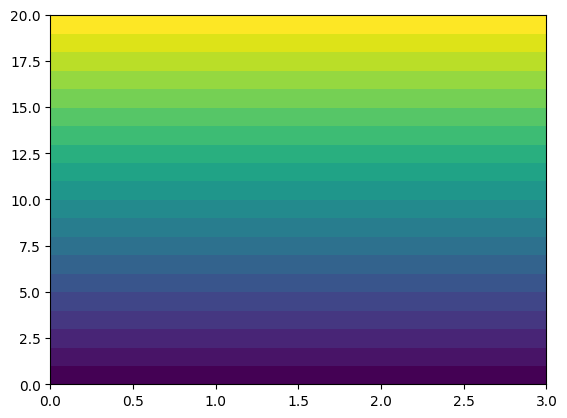

In [38]:
plt.pcolor(data)

In [28]:
bounds = [[-2, 2], [-2, 2]]
# параметры
X = np.array([0.0, 1.0])
Y = np.array([0.0, 1.0])
# результаты
Z = np.array([check(0.0, 0.0), check(1.0, 1.0)])

In [29]:
print(X, Y, Z)

[0. 1.] [0. 1.] [0 0]


In [30]:
newX1 = nextPoint(np.column_stack([X, Y]), Z, bounds=bounds, **samplerParams)
print("newX1 =", newX1)

newX1 = [-1.989046  1.      ]


In [33]:
print(X, Y)
point = nextPoint(np.column_stack([X, Y]), Z, bounds=bounds, **samplerParams)
print(X, Y)
X = np.append(X, point[0])
Y = np.append(Y, point[1])
print(check(point[0], point[1]))
Z = np.append(Z, check(point[0], point[1]))
data = pd.DataFrame([X, Y, Z])
plt.pcolor(data)

[ 0.        1.       -1.989046 -1.989046] [ 0.        1.        1.       -1.989046]


c:\Users\Nik\AppData\Local\Programs\Python\Python311\Lib\site-packages\minlpe\ML.py:120: UserWarning: Constant function. Gradient = 0. x.shape=(3, 2)
  warnings.warn(f'Constant function. Gradient = 0. x.shape={self.train_x.shape}')
c:\Users\Nik\AppData\Local\Programs\Python\Python311\Lib\site-packages\minlpe\ML.py:120: UserWarning: Constant function. Gradient = 0. x.shape=(4, 2)
  warnings.warn(f'Constant function. Gradient = 0. x.shape={self.train_x.shape}')


ValueError: zero-size array to reduction operation minimum which has no identity

In [8]:
def check(x, y):
    try:
        if y >= np.sqrt(1 - x**2) and y <= np.sqrt(1.5 - x**2):
            return 1
        if y <= -np.sqrt(1 - x**2) and y >= -np.sqrt(1.5 - x**2):
            return 1
    except:
        return 0
    return 0

In [ ]:
masX = np.linspace(-2, 2, 500)
masY = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(masX, masY)
print(len(X))
Z = [[]]
for row in range(len(X)):
    Z.append([])
    for point in range(len(X[row])):
        Z[row].append(check(X[row][point], Y[row][point]))
del Z[len(Z) - 1]
Z = np.array(Z, dtype=int)

[-1.989046 -1.989046]
[[0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0]]


c:\Users\Nik\AppData\Local\Programs\Python\Python311\Lib\site-packages\minlpe\ML.py:120: UserWarning: Constant function. Gradient = 0. x.shape=(3, 2)
  warnings.warn(f'Constant function. Gradient = 0. x.shape={self.train_x.shape}')
C:\Users\Nik\AppData\Local\Temp\ipykernel_2696\2364936850.py:3: RuntimeWarning: invalid value encountered in sqrt
  if y>=np.sqrt(1-x**2) and y<=np.sqrt(1.5-x**2): return 1
C:\Users\Nik\AppData\Local\Temp\ipykernel_2696\2364936850.py:4: RuntimeWarning: invalid value encountered in sqrt
  if y<=-np.sqrt(1-x**2) and y>=-np.sqrt(1.5-x**2): return 1
C:\Users\Nik\AppData\Local\Temp\ipykernel_2696\2311034697.py:14: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(dX,dY,dZ)


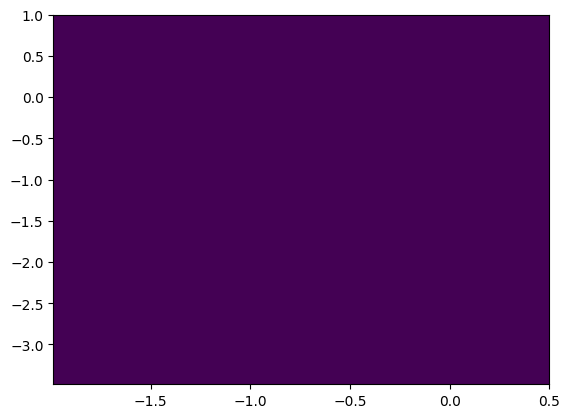

In [164]:
point = nextPoint(np.column_stack([X, Y]), Z, bounds=bounds, **samplerParams)
print(point)
X = np.append(X, point[0])
Y = np.append(Y, point[1])
Z = np.append(Z, check(point[0], point[1]))
dX, dY = np.meshgrid(X, Y)
dZ = [[]]
for row in range(len(dX)):
    dZ.append([])
    for point in range(len(dX[row])):
        dZ[row].append(check(dX[row][point], dY[row][point]))
del dZ[len(dZ) - 1]
print(dZ)
plt.pcolor(dX, dY, dZ)

In [ ]:
masX = np.linspace(-2, 2, 100)
masY = np.linspace(-2, 2, 100)

for dx in masX:
    for dy in masY:
        if check(dx, dy):
            color = "red"
        else:
            color = "blue"
        plt.scatter(dx, dy, c=color)